<a href="https://colab.research.google.com/github/parikssss/Static-ecommerce-website/blob/main/dataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: Import Required Libraries


In [ ]:
# For Data manipulation and analysis
import pandas as pd
import numpy as np

# For Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For Machine learning preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.feature_selection import RFECV

# For Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# For Model evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    ConfusionMatrixDisplay
)
# For Handling imbalanced data
from imblearn.over_sampling import SMOTE

# For Tabular data display
from tabulate import tabulate

#2: Load and Display Dataset

### Purpose: Read the dataset and display basic information about its structure



In [ ]:
seismic_data= pd.read_csv('seismic-bumps-cw.csv') # Reading the CSV file 'seismic-bumps.csv' into a DataFrame named seismic_data
print("\nDataFrame info:")
seismic_data # Displaying the DataFrame to view its contents



DataFrame info:


seismic seismoacoustic shift  genergy  gpuls  gdenergy  gdpuls ghazard  \
0          a              a     N  15180.0     48       -72     -72       a   
1          a              a     N  14720.0     33       -70     -79       a   
2          a              a     N   8050.0     30       -81     -78       a   
3          a              a     N  28820.0    171       -23      40       a   
4          a              a     N  12640.0     57       -63     -52       a   
...      ...            ...   ...      ...    ...       ...     ...     ...   
2578       a              a   NaN  12750.0    235       -10     -10       a   
2579       a              a   NaN  12750.0    235       -10     -10       a   
2580       a              a     W      NaN    235       -10     -10       a   
2581       b              a     W  42640.0    576       264     150       a   
2582       b              a     N   5120.0    121       -55     -46       a   

      nbumps  nbumps2  nbumps3  nbumps4  nbumps5  nbumps6  nbumps7  nbumps89  \
0          0      0.0        0        0        0        0        0         0   
1          1      0.0        1        0        0        0        0         0   
2          0      0.0        0        0        0        0        0         0   
3          1      0.0        1        0        0        0        0         0   
4          0      0.0        0        0        0        0        0         0   
...      ...      ...      ...      ...      ...      ...      ...       ...   
2578       0      0.0        0        0        0        0        0         0   
2579       0      NaN        0        0        0        0        0         0   
2580       0      0.0        0        0        0        0        0         0   
2581       0      0.0        0        0        0        0        0         0   
2582       0      0.0        0        0        0        0        0         0   

      energy  maxenergy  class  
0          0          0      0  
1       2000       2000      0  
2          0          0      0  
3       3000       3000      0  
4          0          0      0  
...      ...        ...    ...  
2578       0          0      0  
2579       0          0      0  
2580       0          0      0  
2581       0          0      0  
2582       0          0      0  

[2583 rows x 19 columns]

In [ ]:
# Display basic information using tabulate for clean tables
print("\n=== First Few Rows ===")
print(tabulate(seismic_data.head(), headers='keys', tablefmt='fancy_grid'))

print("\n=== Last Few Rows ===")
print(tabulate(seismic_data.tail(), headers='keys', tablefmt='fancy_grid'))

print("\n=== Random Sample (5 Rows) ===")
print(tabulate(seismic_data.sample(5), headers='keys', tablefmt='fancy_grid'))

# Display dataset dimensions and size
print("\n=== Dataset Summary ===")
print(f"Dataset shape: {seismic_data.shape}")
print(f"Dataset size: {seismic_data.size}")


=== First Few Rows ===
╒════╤═══════════╤══════════════════╤═════════╤═══════════╤═════════╤════════════╤══════════╤═══════════╤══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤════════════╤══════════╤═════════════╤═════════╕
│    │ seismic   │ seismoacoustic   │ shift   │   genergy │   gpuls │   gdenergy │   gdpuls │ ghazard   │   nbumps │   nbumps2 │   nbumps3 │   nbumps4 │   nbumps5 │   nbumps6 │   nbumps7 │   nbumps89 │   energy │   maxenergy │   class │
╞════╪═══════════╪══════════════════╪═════════╪═══════════╪═════════╪════════════╪══════════╪═══════════╪══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪════════════╪══════════╪═════════════╪═════════╡
│  0 │ a         │ a                │ N       │     15180 │      48 │        -72 │      -72 │ a         │        0 │         0 │         0 │         0 │         0 │         0 │         0 │          0 │        0 │           0 │       0 │
├────┼───────────┼──────────

# 3: Data Quality Check

### Purpose: Check for missing values and duplicates in the dataset



In [ ]:
print("\n=== Data Quality Analysis ===")

# Check for missing values
print("\nMissing values per column:")
print(seismic_data.isnull().sum())

# Handle missing values
seismic_data = seismic_data.dropna()
print("\nMissing values after cleaning:")
print(seismic_data.isnull().sum())

# Check duplicates before removing
print(f"\nNumber of duplicate rows before cleaning: {seismic_data.duplicated().sum()}")

# Remove duplicates
seismic_data = seismic_data.drop_duplicates()

# Check duplicates after removing
print(f"\nNumber of duplicate rows after cleaning: {seismic_data.duplicated().sum()}")



=== Data Quality Analysis ===

Missing values per column:
seismic           0
seismoacoustic    0
shift             2
genergy           1
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
nbumps2           1
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64

Missing values after cleaning:
seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
nbumps2           0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64

Number of duplicate rows before cleaning: 2

Number of duplicate rows after cleaning: 0


# 4. Data Visualization


### 4.1. Bubble Chart (Multivariate)

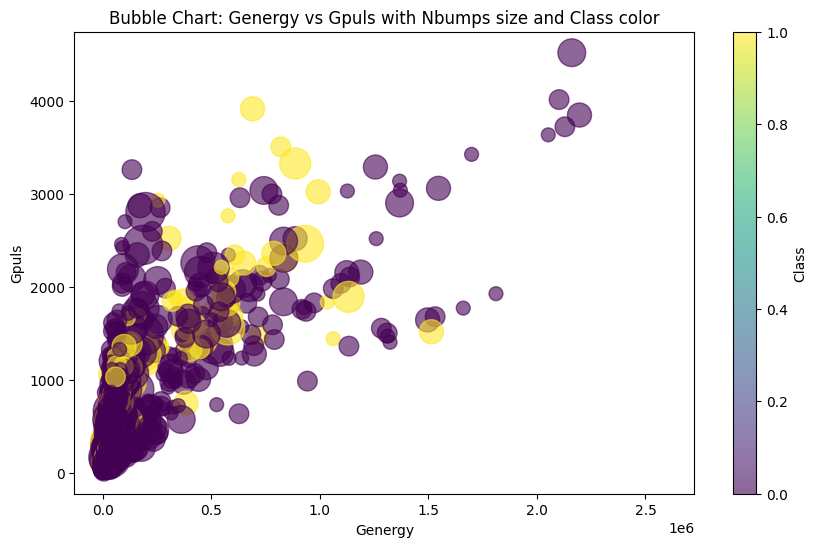

In [ ]:
# Bubble Chart: Genergy vs Gpuls with Nbumps size and Class color
plt.figure(figsize=(10, 6))
plt.scatter(seismic_data['genergy'], seismic_data['gpuls'],
           s=seismic_data['nbumps']*100, # Bubble size proportional to Nbumps
           c=seismic_data['class'], # Bubble color based on class (hazard/non-hazard)
           alpha=0.6) # Transparency of the bubbles
plt.xlabel('Genergy') # Label for x-axis
plt.ylabel('Gpuls') # Label for y-axis
plt.title('Bubble Chart: Genergy vs Gpuls with Nbumps size and Class color') # Title of the chart
plt.colorbar(label='Class') # Add color bar to indicate class labels
plt.show()


### 4.2. 3D Scatter Plot (Multivariate)

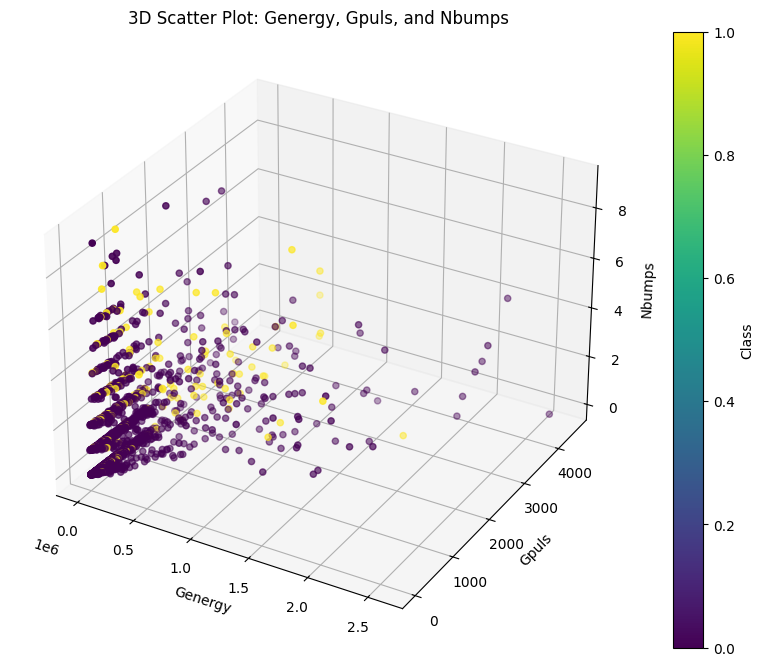

In [ ]:
# 3D Scatter Plot: Genergy, Gpuls, and Nbumps
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d') # Create 3D scatter plot
scatter = ax.scatter(seismic_data['genergy'], # X-axis: Genergy
                    seismic_data['gpuls'], # Y-axis: Gpuls
                    seismic_data['nbumps'], # Z-axis: Nbumps
                    c=seismic_data['class'], # Color based on class
                    cmap='viridis') # Colormap for the classes
ax.set_xlabel('Genergy') # Label for x-axis
ax.set_ylabel('Gpuls') # Label for y-axis
ax.set_zlabel('Nbumps') # Label for z-axis
plt.colorbar(scatter, label='Class') # Add color bar
plt.title('3D Scatter Plot: Genergy, Gpuls, and Nbumps') # Title of the chart
plt.show()


### 4.3. Pie Chart (Univariate)


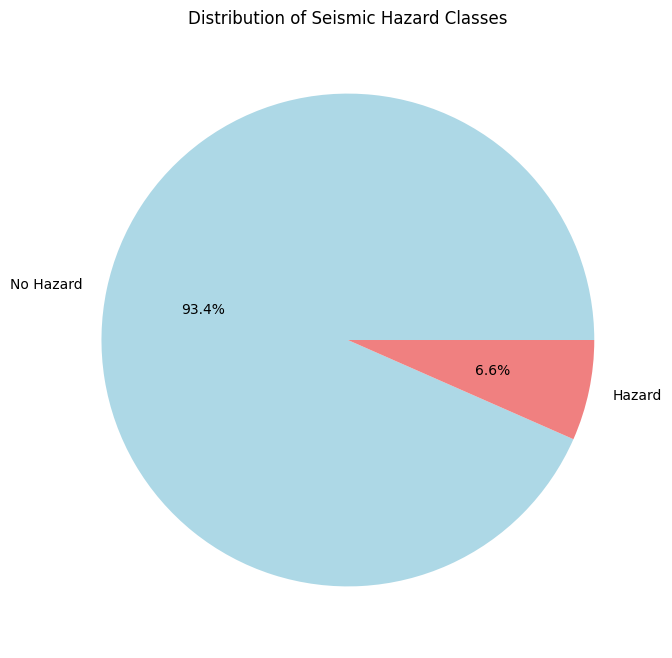

In [ ]:
# Pie Chart: Distribution of Seismic Hazard Classes
plt.figure(figsize=(8, 8))
class_counts = seismic_data['class'].value_counts() # Count of each class
plt.pie(class_counts, labels=['No Hazard', 'Hazard'], # Labels for the pie chart
        autopct='%1.1f%%', # Display percentage with 1 decimal place
        colors=['lightblue', 'lightcoral']) # Colors for each class
plt.title('Distribution of Seismic Hazard Classes') # Title of the chart
plt.show()


### 4.4. Histogram (Univariate with multiple distributions)

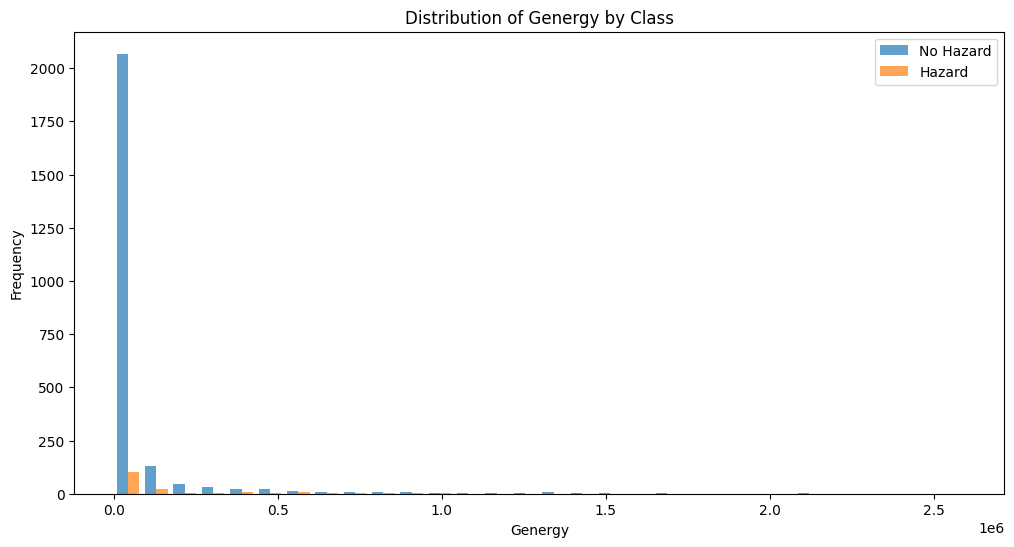

In [ ]:
# Histogram: Distribution of Genergy by Class
plt.figure(figsize=(12, 6))
plt.hist([
    seismic_data[seismic_data['class']==0]['genergy'], # Genergy for class 0 (No Hazard)
    seismic_data[seismic_data['class']==1]['genergy'] # Genergy for class 1 (Hazard)
], bins=30, # Number of bins in the histogram
   label=['No Hazard', 'Hazard'], # Labels for the histogram
   alpha=0.7) # Transparency
plt.title('Distribution of Genergy by Class') # Title of the chart
plt.xlabel('Genergy') # Label for x-axis
plt.ylabel('Frequency') # Label for y-axis
plt.legend() # Add legend
plt.show()



### 4.5. Bar Graph (Bivariate)

<Figure size 1000x600 with 0 Axes>

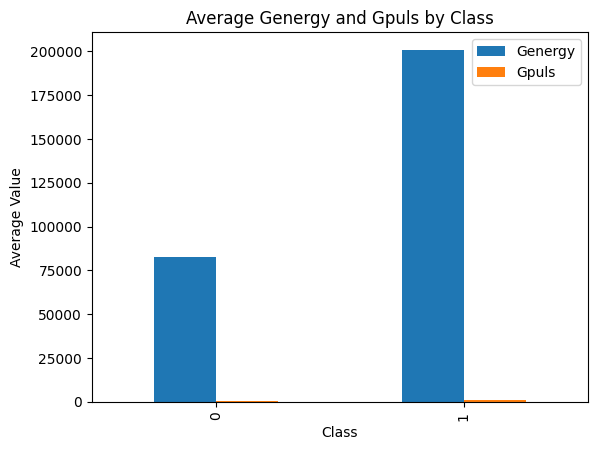

In [ ]:
# Bar Chart: Average Genergy and Gpuls by Class
plt.figure(figsize=(10, 6))
average_energy = seismic_data.groupby('class')[['genergy', 'gpuls']].mean() # Calculate average values
average_energy.plot(kind='bar') # Bar chart
plt.title('Average Genergy and Gpuls by Class') # Title of the chart
plt.xlabel('Class') # Label for x-axis
plt.ylabel('Average Value') # Label for y-axis
plt.legend(['Genergy', 'Gpuls']) # Legend labels
plt.show()


### 4.6. Subplots with Multiple Charts (Multivariate)

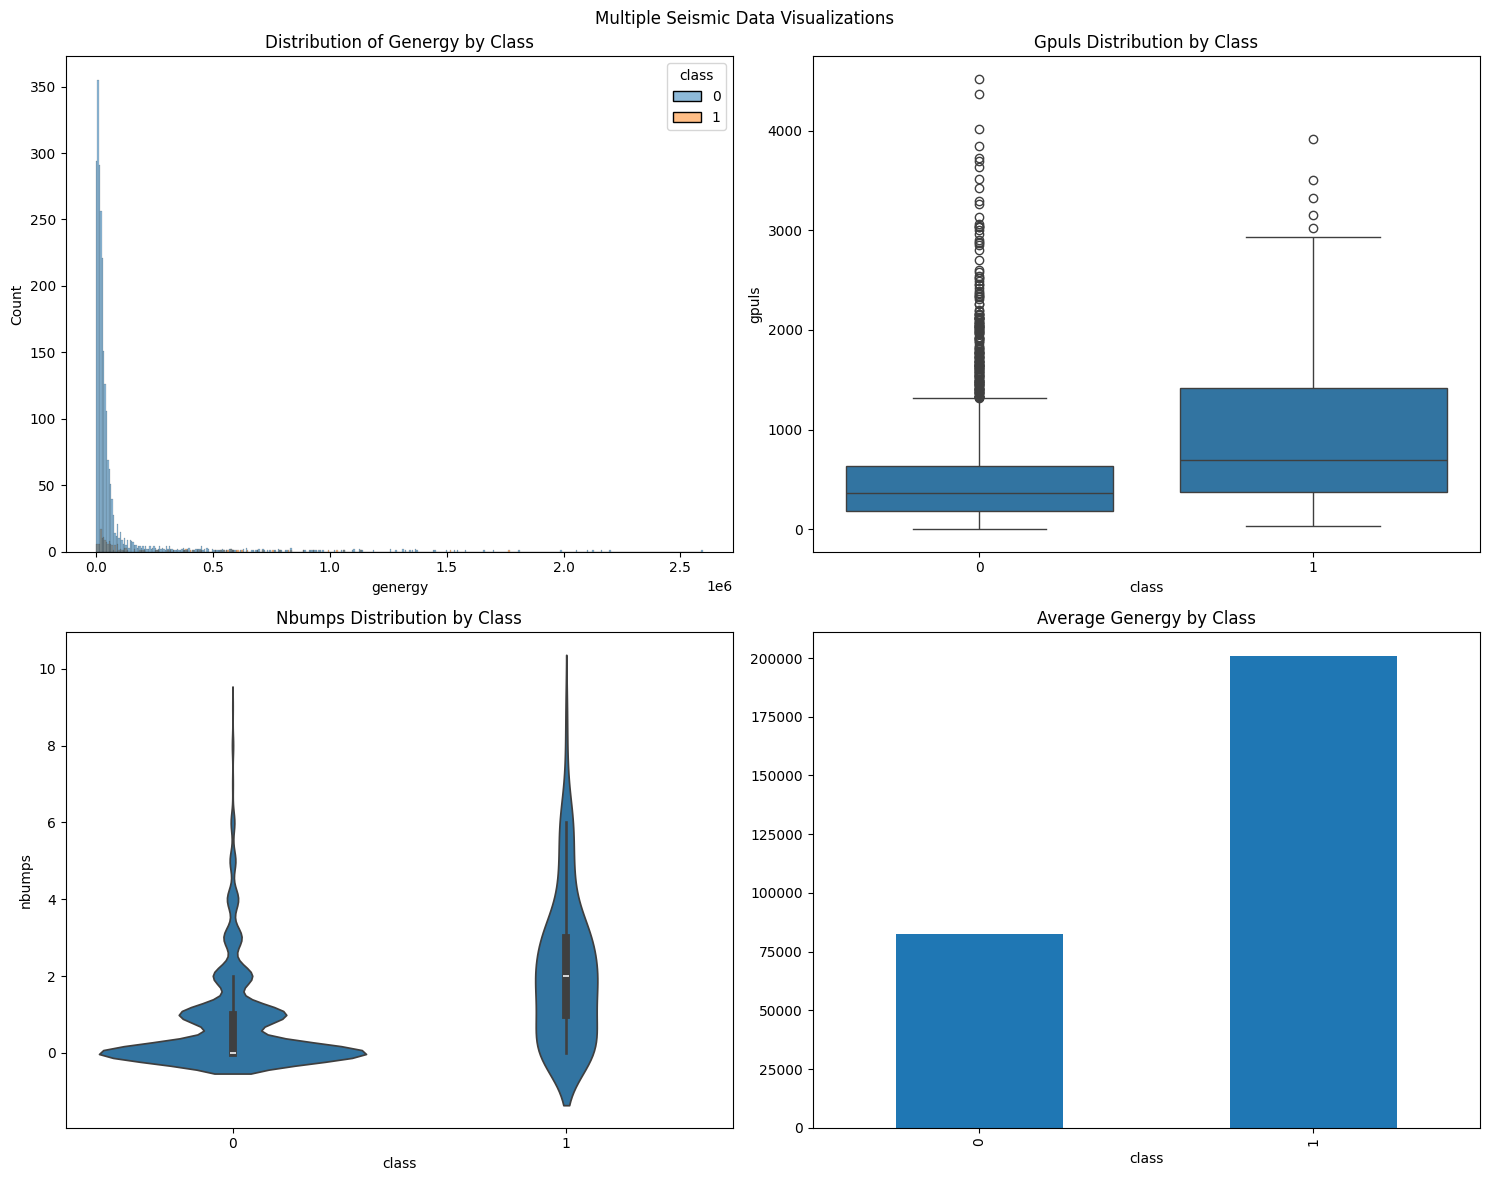

In [ ]:
# Subplots: Multiple Seismic Data Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12)) # Create 2x2 subplot grid
fig.suptitle('Multiple Seismic Data Visualizations') # Overall title

# Subplot 1: Histogram
sns.histplot(data=seismic_data, x='genergy', hue='class', ax=axes[0,0]) # Histogram with hue by class
axes[0,0].set_title('Distribution of Genergy by Class') # Title of subplot 1

# Subplot 2: Box Plot
sns.boxplot(data=seismic_data, x='class', y='gpuls', ax=axes[0,1]) # Box plot for Gpuls
axes[0,1].set_title('Gpuls Distribution by Class') # Title of subplot 2

# Subplot 3: Violin Plot
sns.violinplot(data=seismic_data, x='class', y='nbumps', ax=axes[1,0]) # Violin plot for Nbumps
axes[1,0].set_title('Nbumps Distribution by Class') # Title of subplot 3

# Subplot 4: Bar Plot
seismic_data.groupby('class')['genergy'].mean().plot(kind='bar', ax=axes[1,1]) # Bar plot for average Genergy
axes[1,1].set_title('Average Genergy by Class') # Title of subplot 4

plt.tight_layout() # Adjust layout to avoid overlap
plt.show()


### 4.7. Count Plot (Univariate)

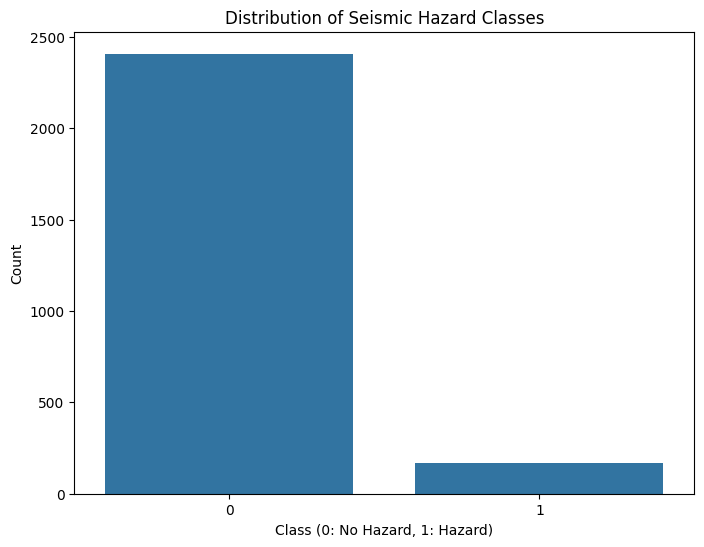

In [ ]:
# Count Plot: Distribution of Classes
plt.figure(figsize=(8, 6))
sns.countplot(data=seismic_data, x='class') # Count plot for classes
plt.title('Distribution of Seismic Hazard Classes') # Title of the plot
plt.xlabel('Class (0: No Hazard, 1: Hazard)') # Label for x-axis
plt.ylabel('Count') # Label for y-axis
plt.show()


### 4.8. Advanced Bubble Chart with Multiple Features (Multivariate)

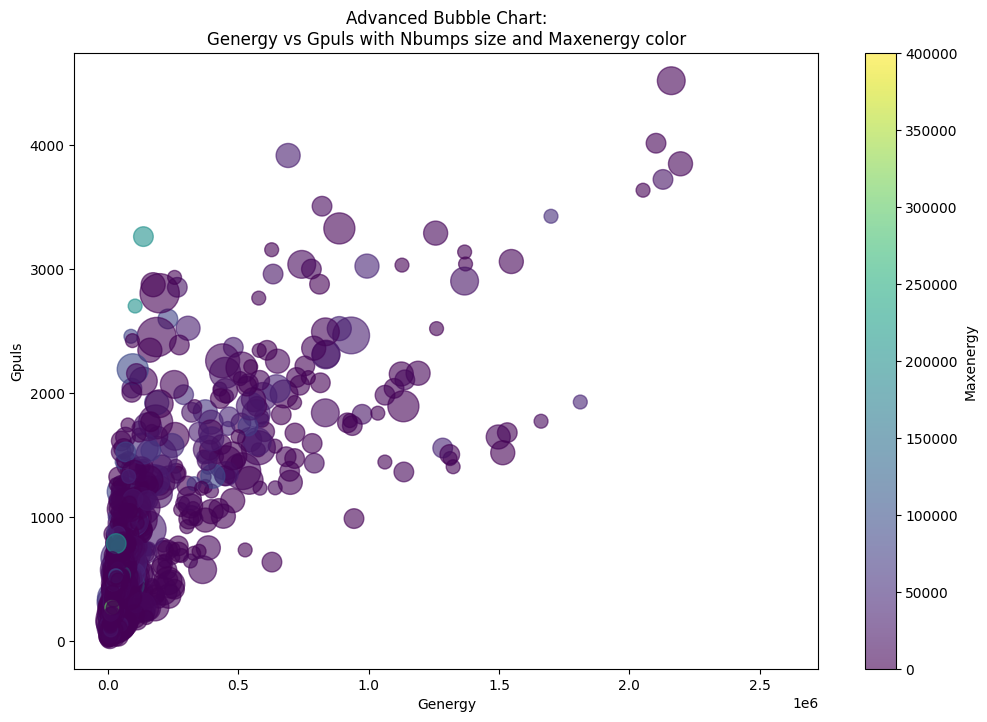

In [ ]:
# Advanced Bubble Chart: Genergy vs Gpuls with Nbumps size and Maxenergy color
plt.figure(figsize=(12, 8))
scatter = plt.scatter(seismic_data['genergy'],
                     seismic_data['gpuls'], # Gpuls for y-axis
                     s=seismic_data['nbumps']*100, # Bubble size based on Nbumps
                     c=seismic_data['maxenergy'], # Color based on Maxenergy
                     alpha=0.6, # Transparency
                     cmap='viridis') # Colormap
plt.xlabel('Genergy') # Label for x-axis
plt.ylabel('Gpuls') # Label for y-axis
plt.title('Advanced Bubble Chart:\nGenergy vs Gpuls with Nbumps size and Maxenergy color') # Title of the chart
plt.colorbar(scatter, label='Maxenergy') # Add color bar for Maxenergy
plt.show()



### 4.9. Sub plots

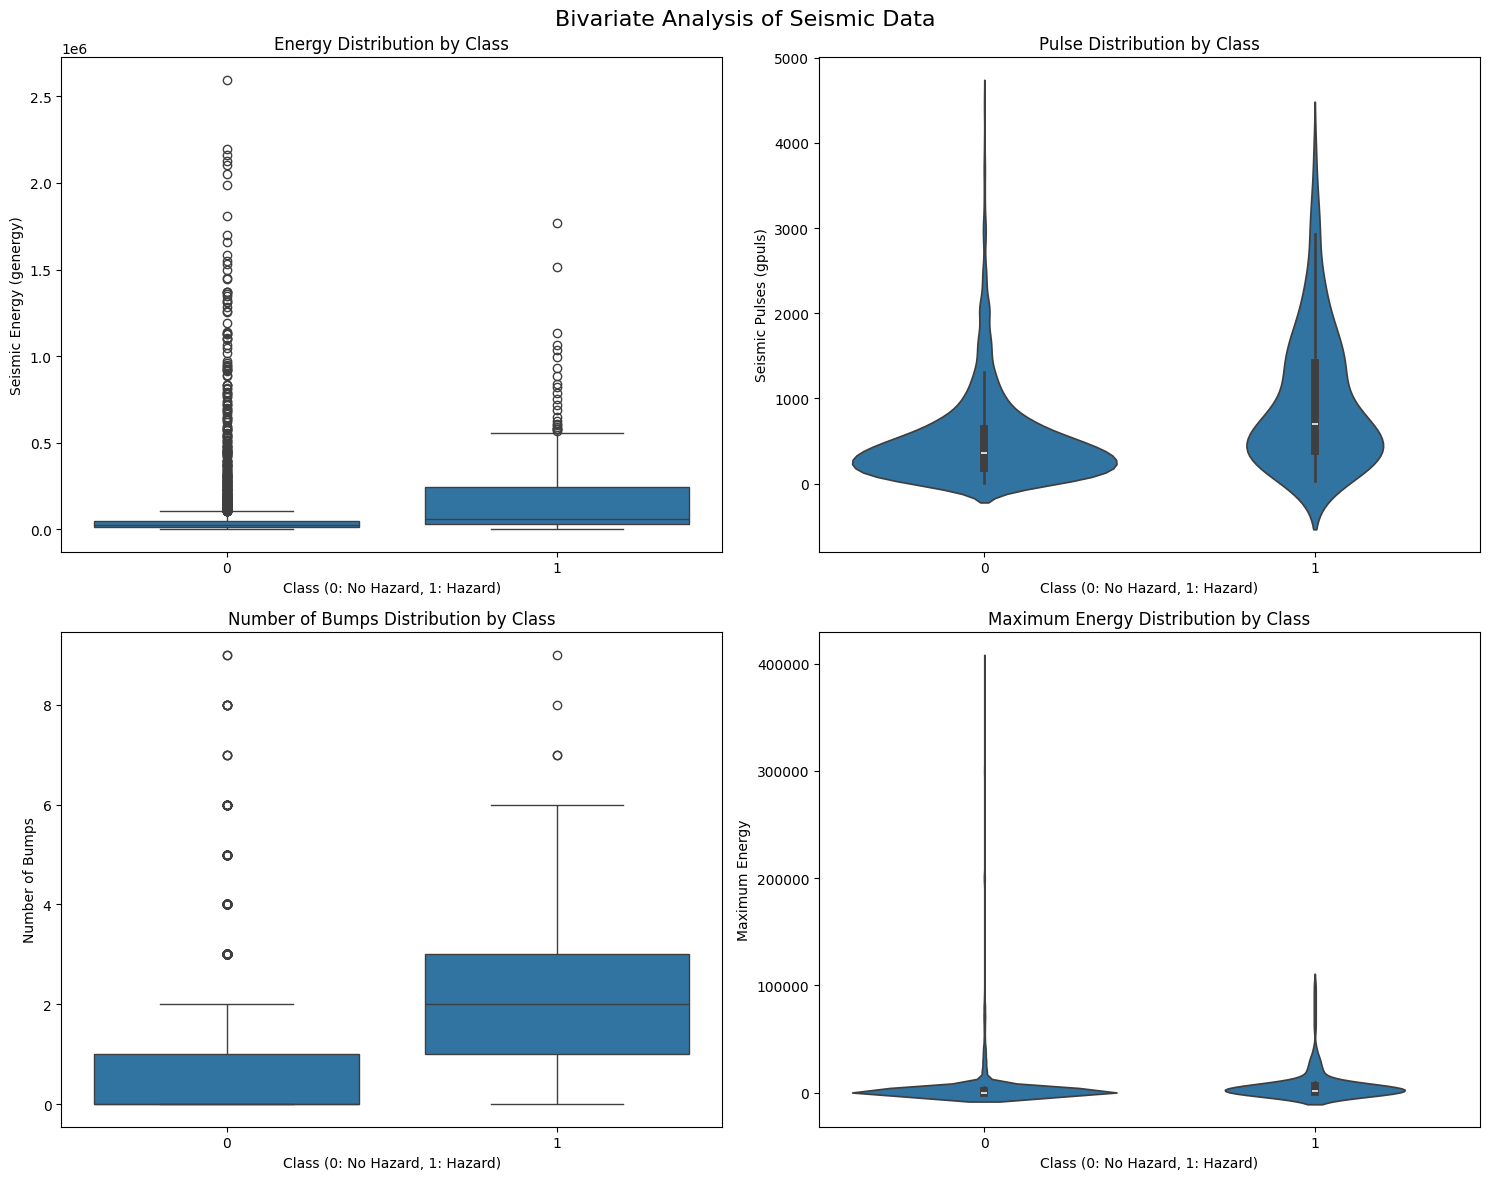

In [ ]:
#Create a figure with 2x2 subplots for bivariate analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Bivariate Analysis of Seismic Data', fontsize=16)

# 2.1 Box Plot of Energy by Class
sns.boxplot(data=seismic_data, x='class', y='genergy', ax=axes[0,0])
axes[0,0].set_title('Energy Distribution by Class')
axes[0,0].set_xlabel('Class (0: No Hazard, 1: Hazard)')
axes[0,0].set_ylabel('Seismic Energy (genergy)')

# 2.2 Violin Plot of Pulses by Class
sns.violinplot(data=seismic_data, x='class', y='gpuls', ax=axes[0,1])
axes[0,1].set_title('Pulse Distribution by Class')
axes[0,1].set_xlabel('Class (0: No Hazard, 1: Hazard)')
axes[0,1].set_ylabel('Seismic Pulses (gpuls)')

# 2.3 Box Plot of Number of Bumps by Class
sns.boxplot(data=seismic_data, x='class', y='nbumps', ax=axes[1,0])
axes[1,0].set_title('Number of Bumps Distribution by Class')
axes[1,0].set_xlabel('Class (0: No Hazard, 1: Hazard)')
axes[1,0].set_ylabel('Number of Bumps')

# 2.4 Violin Plot of Maximum Energy by Class
sns.violinplot(data=seismic_data, x='class', y='maxenergy', ax=axes[1,1])
axes[1,1].set_title('Maximum Energy Distribution by Class')
axes[1,1].set_xlabel('Class (0: No Hazard, 1: Hazard)')
axes[1,1].set_ylabel('Maximum Energy')

plt.tight_layout()
plt.show()

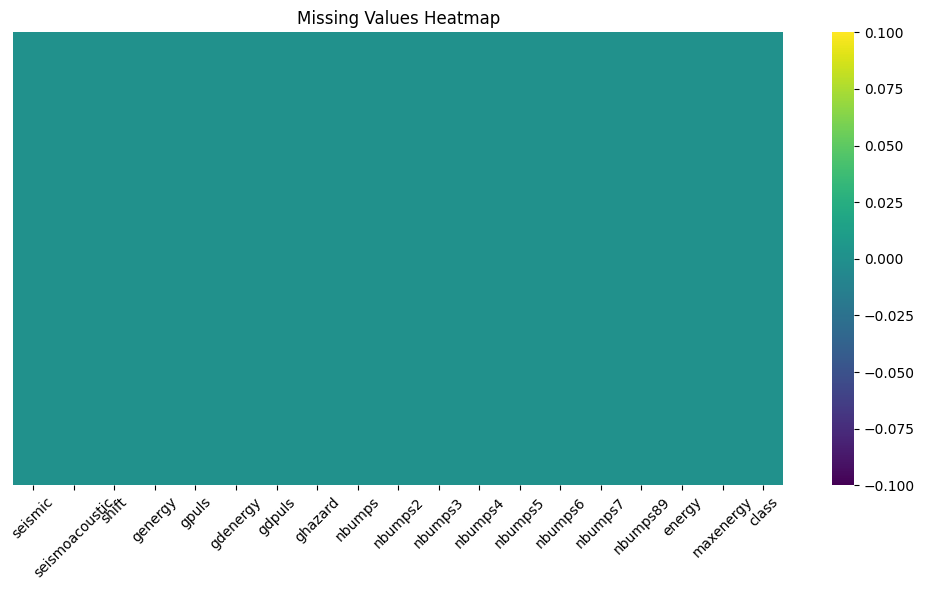


Missing Values Percentage:
seismic           0.0
seismoacoustic    0.0
shift             0.0
genergy           0.0
gpuls             0.0
gdenergy          0.0
gdpuls            0.0
ghazard           0.0
nbumps            0.0
nbumps2           0.0
nbumps3           0.0
nbumps4           0.0
nbumps5           0.0
nbumps6           0.0
nbumps7           0.0
nbumps89          0.0
energy            0.0
maxenergy         0.0
class             0.0
dtype: float64


In [ ]:
# Heatmap: Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(seismic_data.isnull(), # Heatmap to show missing values
            yticklabels=False, # Hide y-axis labels
            cmap='viridis', # Colormap
            cbar=True) # Add color bar
plt.title('Missing Values Heatmap') # Title of the plot
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

# Print percentage of missing values
print("\nMissing Values Percentage:")
print((seismic_data.isnull().sum() / len(seismic_data)) * 100) # Calculate missing value percentages


# 5: Feature Analysis and Engineering

### Purpose: Analyze feature types and perform initial feature engineering

In [ ]:
# Display data types and unique values
print("\n=== Data Type Analysis ===")
print(seismic_data.dtypes)
print("\nUnique values per column:")
print(seismic_data.nunique())


=== Data Type Analysis ===
seismic            object
seismoacoustic     object
shift              object
genergy           float64
gpuls               int64
gdenergy            int64
gdpuls              int64
ghazard            object
nbumps              int64
nbumps2           float64
nbumps3             int64
nbumps4             int64
nbumps5             int64
nbumps6             int64
nbumps7             int64
nbumps89            int64
energy              int64
maxenergy           int64
class               int64
dtype: object

Unique values per column:
seismic              2
seismoacoustic       3
shift                2
genergy           2212
gpuls             1128
gdenergy           334
gdpuls             292
ghazard              3
nbumps              10
nbumps2              7
nbumps3              7
nbumps4              4
nbumps5              2
nbumps6              1
nbumps7              1
nbumps89             1
energy             242
maxenergy           33
class                2


In [ ]:
#Constant columns do not provide any valuable information for prediction tasks and only add noise to the dataset
print("\n=== Identifying and Removing Constant Columns ===")

# Identify constant columns
constant_cols = [col for col in seismic_data.columns if seismic_data[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

# Remove constant columns
seismic_data = seismic_data.drop(columns=constant_cols)
print("Status: Removed")



=== Identifying and Removing Constant Columns ===
Constant columns: ['nbumps6', 'nbumps7', 'nbumps89']
Status: Removed


# 6: Feature Engineering and Encoding
### Purpose: Convert categorical variables to numerical format



In [ ]:
# Define categorical columns first
categorical_cols = ['seismic', 'seismoacoustic', 'shift', 'ghazard']

print("\n=== Target Variable Definition ===")
print("Class 0: No seismic hazard detected")
print("Class 1: Seismic hazard detected")

from tabulate import tabulate

# Label Encoding
print("\n=== Before Label Encoding ===")
print(tabulate(seismic_data[categorical_cols].head(), headers='keys', tablefmt='pretty'))

label_encoder = LabelEncoder()
for col in ['seismic', 'seismoacoustic', 'ghazard']:  # Exclude 'shift' as it will be one-hot encoded
    seismic_data[col] = label_encoder.fit_transform(seismic_data[col])

print("\n=== After Label Encoding ===")
print(tabulate(seismic_data[['seismic', 'seismoacoustic', 'ghazard']].head(), headers='keys', tablefmt='pretty'))

# One-hot encoding for 'shift'
print("\n=== Before One-Hot Encoding (shift column) ===")
print(tabulate(seismic_data[['shift']].head(), headers='keys', tablefmt='pretty'))

shift_encoded = pd.get_dummies(seismic_data['shift'], prefix='shift')
seismic_data = pd.concat([seismic_data, shift_encoded], axis=1)
seismic_data = seismic_data.drop('shift', axis=1)

print("\n=== After One-Hot Encoding ===")
print(tabulate(seismic_data.head(), headers='keys', tablefmt='pretty'))

# Convert boolean to int (0/1)
seismic_data[['shift_N', 'shift_W']] = seismic_data[['shift_N', 'shift_W']].astype(int)

print("\n=== After Converting Boolean to Int (0/1) ===")
print(tabulate(seismic_data[['shift_N', 'shift_W']].head(), headers='keys', tablefmt='pretty'))



=== Target Variable Definition ===
Class 0: No seismic hazard detected
Class 1: Seismic hazard detected

=== Before Label Encoding ===
+---+---------+----------------+-------+---------+
|   | seismic | seismoacoustic | shift | ghazard |
+---+---------+----------------+-------+---------+
| 0 |    a    |       a        |   N   |    a    |
| 1 |    a    |       a        |   N   |    a    |
| 2 |    a    |       a        |   N   |    a    |
| 3 |    a    |       a        |   N   |    a    |
| 4 |    a    |       a        |   N   |    a    |
+---+---------+----------------+-------+---------+

=== After Label Encoding ===
+---+---------+----------------+---------+
|   | seismic | seismoacoustic | ghazard |
+---+---------+----------------+---------+
| 0 |    0    |       0        |    0    |
| 1 |    0    |       0        |    0    |
| 2 |    0    |       0        |    0    |
| 3 |    0    |       0        |    0    |
| 4 |    0    |       0        |    0    |
+---+---------+----------------

# 7: Outlier Detection and Handling
### Purpose: Identify and handle outliers in numerical features


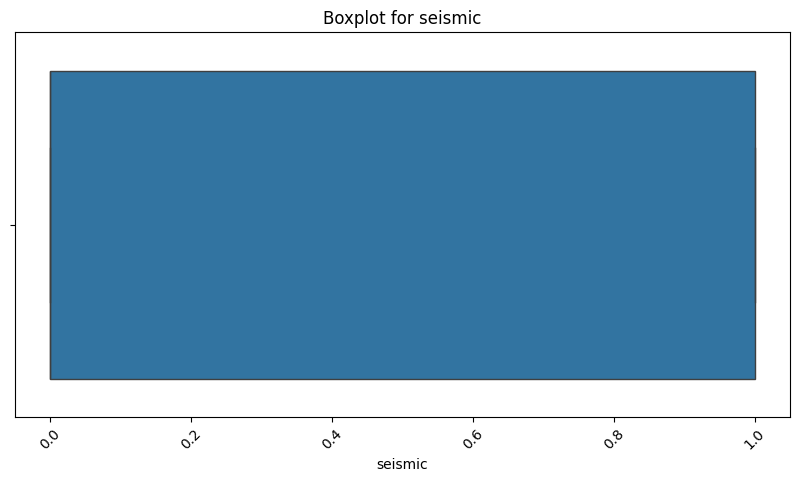


Outlier Analysis for seismic:
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: -1.50
Upper bound: 2.50
--------------------------------------------------


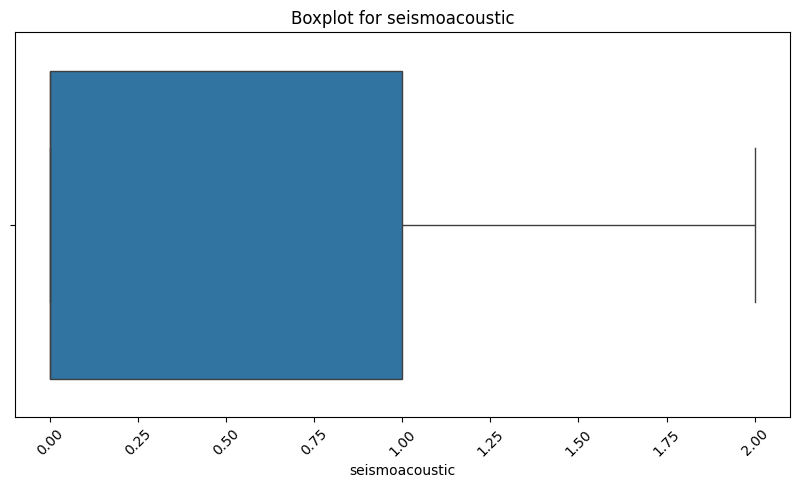


Outlier Analysis for seismoacoustic:
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: -1.50
Upper bound: 2.50
--------------------------------------------------


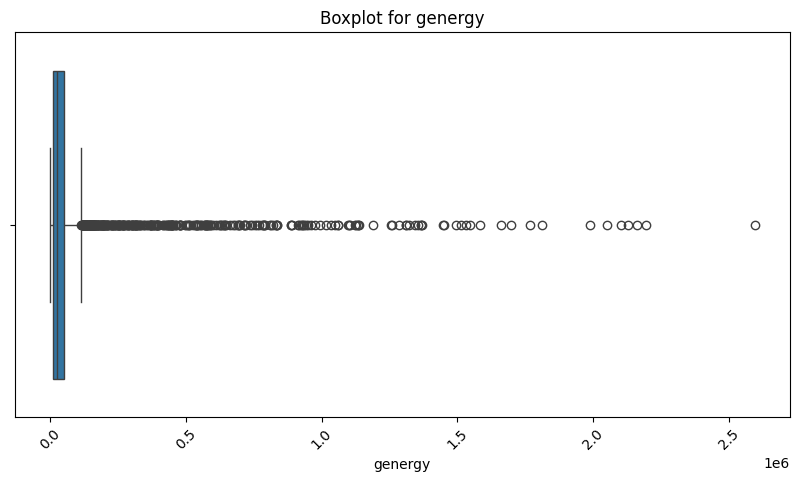


Outlier Analysis for genergy:
Number of outliers: 334
Percentage of outliers: 12.96%
Lower bound: -49905.00
Upper bound: 114355.00
Sample of outlier values: [207930.0, 247620.0, 166180.0, 225040.0, 424650.0]
--------------------------------------------------


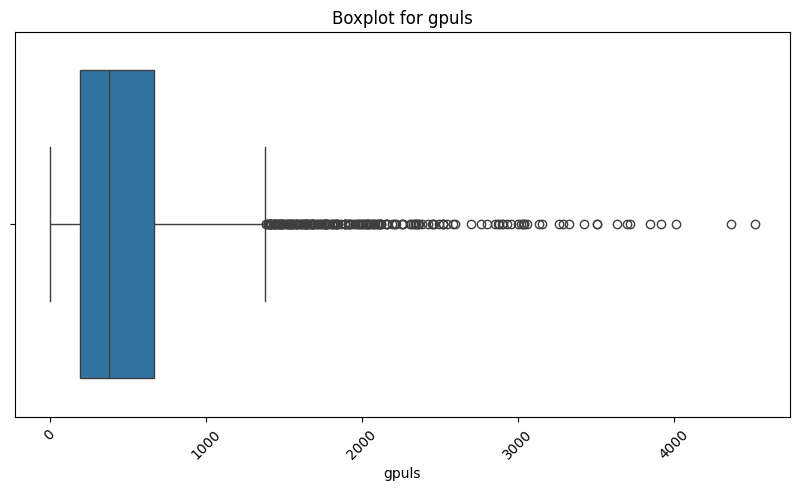


Outlier Analysis for gpuls:
Number of outliers: 201
Percentage of outliers: 7.80%
Lower bound: -525.38
Upper bound: 1385.62
Sample of outlier values: [1409, 1780, 1923, 1678, 1789]
--------------------------------------------------


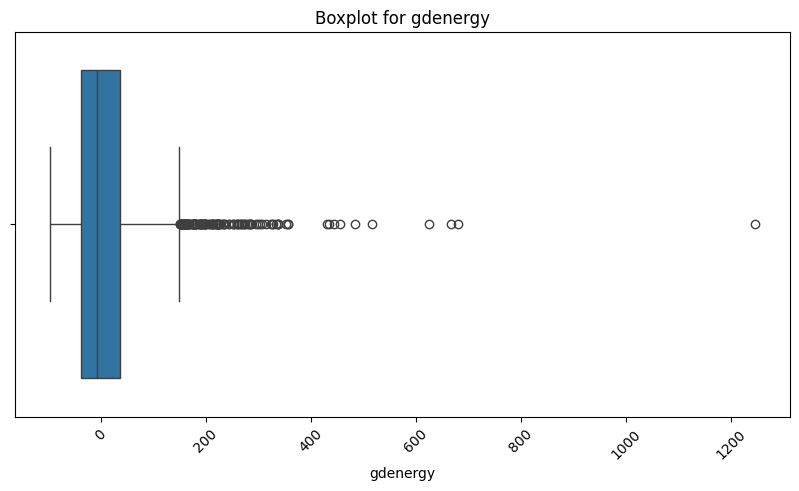


Outlier Analysis for gdenergy:
Number of outliers: 141
Percentage of outliers: 5.47%
Lower bound: -149.50
Upper bound: 150.50
Sample of outlier values: [161, 173, 166, 193, 198]
--------------------------------------------------


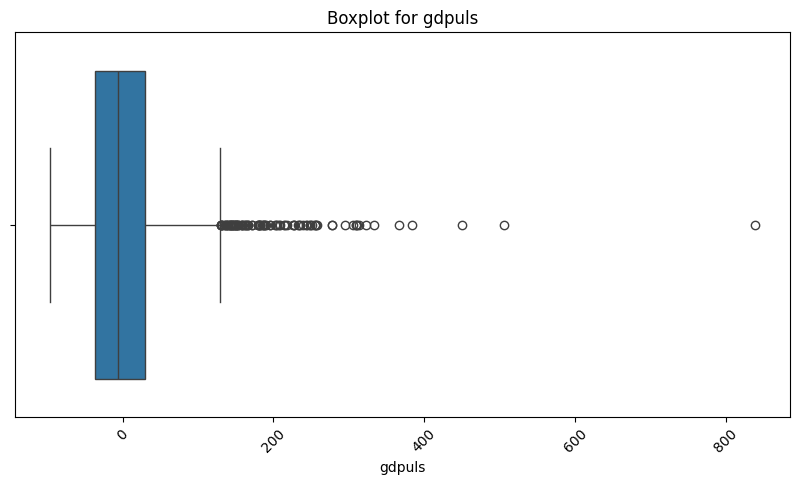


Outlier Analysis for gdpuls:
Number of outliers: 95
Percentage of outliers: 3.69%
Lower bound: -135.00
Upper bound: 129.00
Sample of outlier values: [144, 172, 188, 180, 142]
--------------------------------------------------


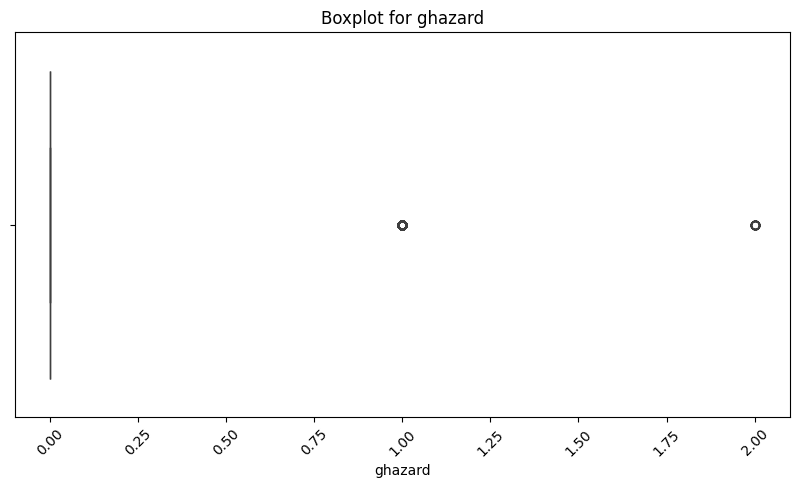


Outlier Analysis for ghazard:
Number of outliers: 242
Percentage of outliers: 9.39%
Lower bound: 0.00
Upper bound: 0.00
Sample of outlier values: [1, 1, 1, 1, 1]
--------------------------------------------------


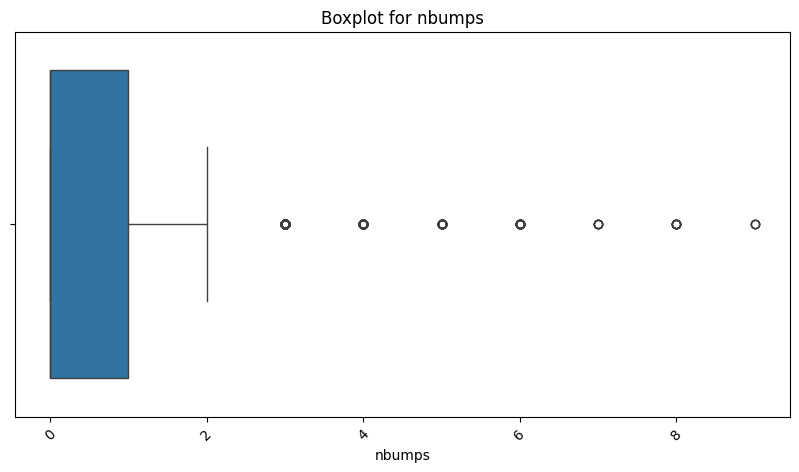


Outlier Analysis for nbumps:
Number of outliers: 277
Percentage of outliers: 10.74%
Lower bound: -1.50
Upper bound: 2.50
Sample of outlier values: [3, 3, 7, 3, 3]
--------------------------------------------------


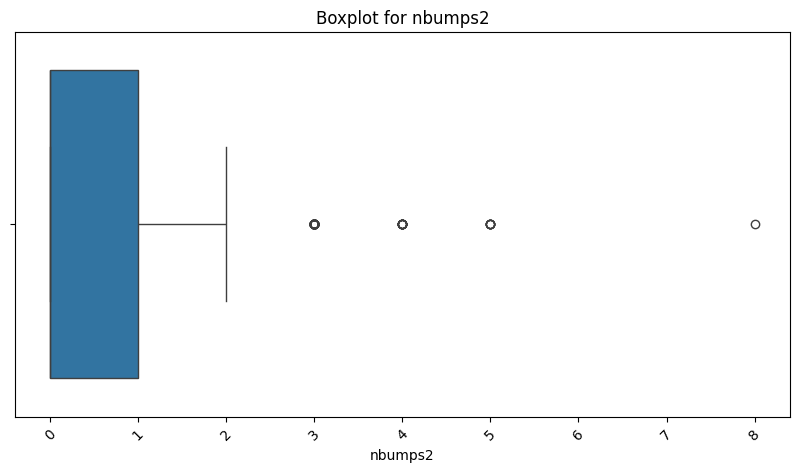


Outlier Analysis for nbumps2:
Number of outliers: 77
Percentage of outliers: 2.99%
Lower bound: -1.50
Upper bound: 2.50
Sample of outlier values: [3.0, 4.0, 3.0, 3.0, 3.0]
--------------------------------------------------


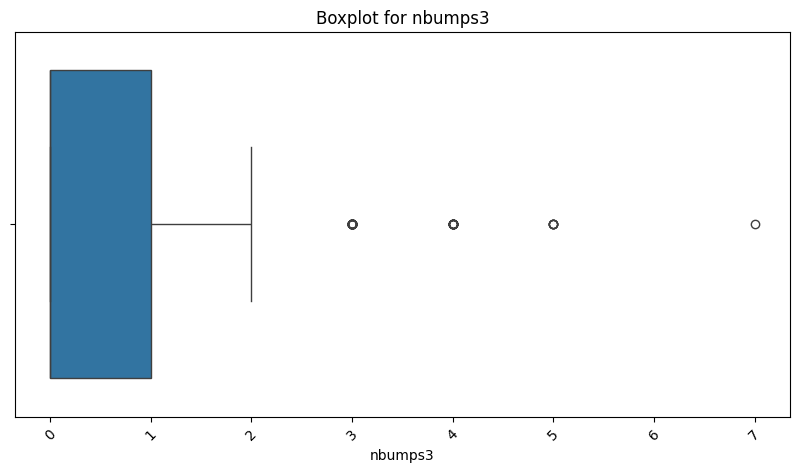


Outlier Analysis for nbumps3:
Number of outliers: 68
Percentage of outliers: 2.64%
Lower bound: -1.50
Upper bound: 2.50
Sample of outlier values: [3, 3, 3, 3, 3]
--------------------------------------------------


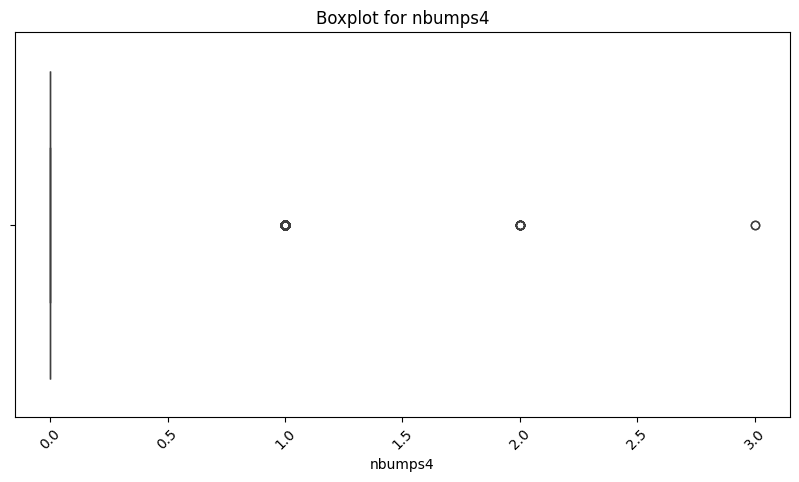


Outlier Analysis for nbumps4:
Number of outliers: 158
Percentage of outliers: 6.13%
Lower bound: 0.00
Upper bound: 0.00
Sample of outlier values: [1, 1, 1, 1, 1]
--------------------------------------------------


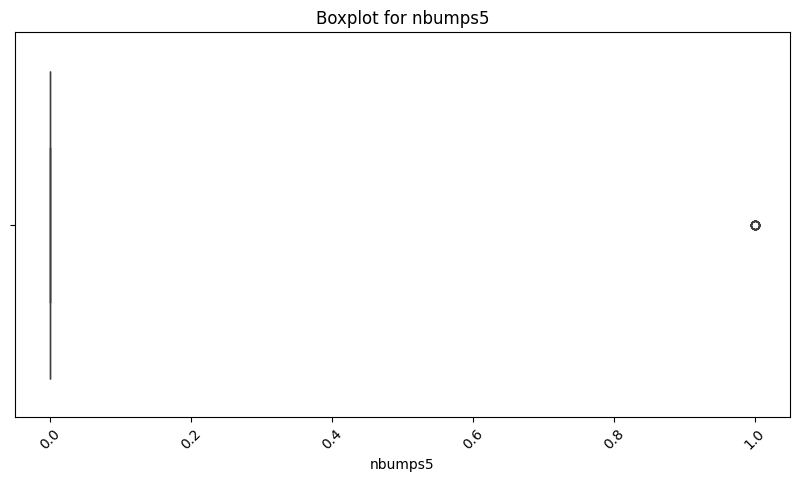


Outlier Analysis for nbumps5:
Number of outliers: 12
Percentage of outliers: 0.47%
Lower bound: 0.00
Upper bound: 0.00
Sample of outlier values: [1, 1, 1, 1, 1]
--------------------------------------------------


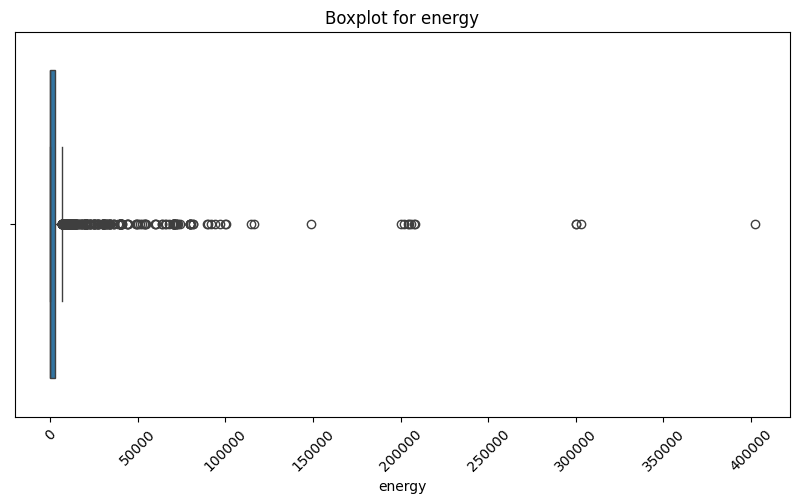


Outlier Analysis for energy:
Number of outliers: 318
Percentage of outliers: 12.34%
Lower bound: -4012.50
Upper bound: 6687.50
Sample of outlier values: [7000, 15700, 7000, 8000, 10000]
--------------------------------------------------


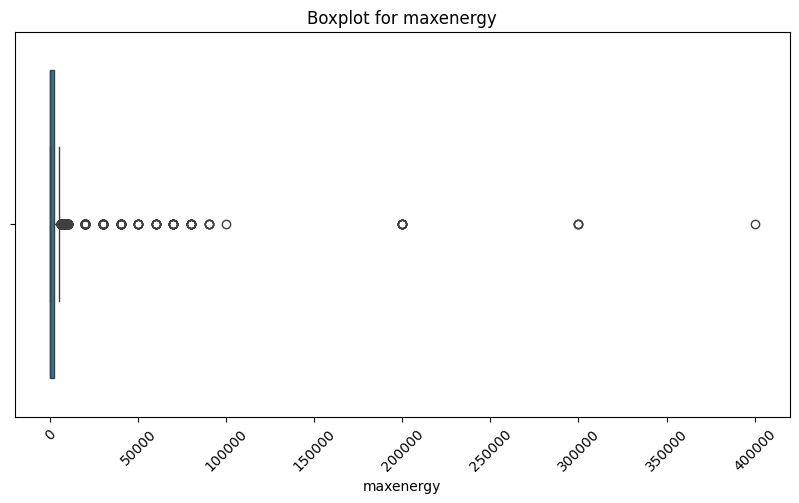


Outlier Analysis for maxenergy:
Number of outliers: 313
Percentage of outliers: 12.14%
Lower bound: -3000.00
Upper bound: 5000.00
Sample of outlier values: [6000, 6000, 6000, 6000, 6000]
--------------------------------------------------


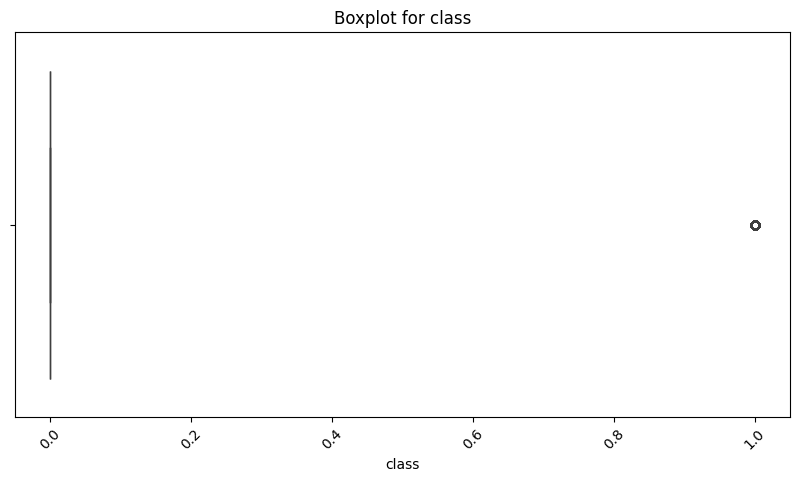


Outlier Analysis for class:
Number of outliers: 170
Percentage of outliers: 6.59%
Lower bound: 0.00
Upper bound: 0.00
Sample of outlier values: [1, 1, 1, 1, 1]
--------------------------------------------------


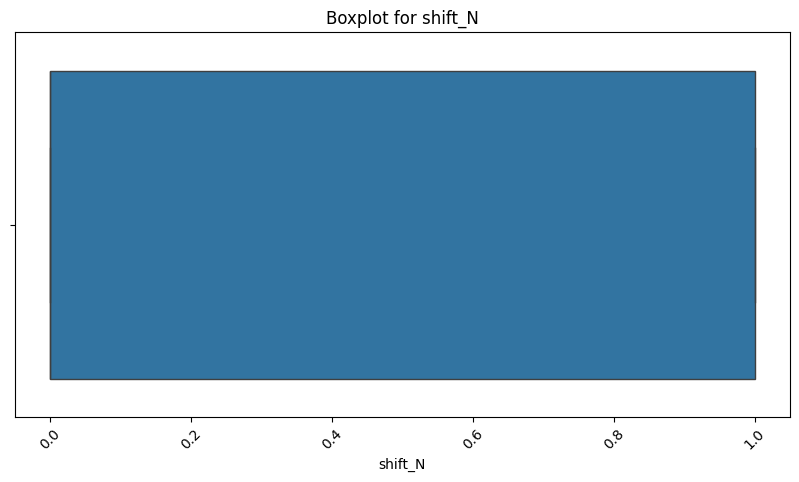


Outlier Analysis for shift_N:
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: -1.50
Upper bound: 2.50
--------------------------------------------------


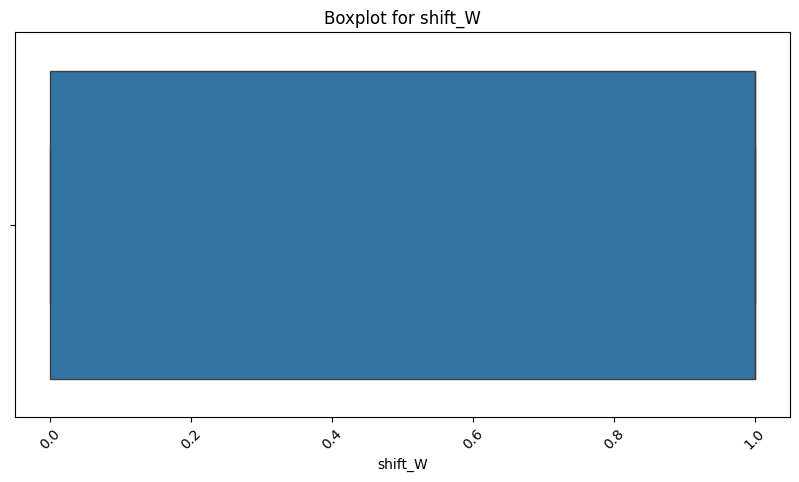


Outlier Analysis for shift_W:
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: -1.50
Upper bound: 2.50
--------------------------------------------------


In [ ]:
numerical_cols = seismic_data.select_dtypes(include=['int64', 'float64']).columns
# Function to identify outliers using IQR method
def get_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Create plots and print outlier statistics for each numerical column
for col in numerical_cols:
    # Create boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=seismic_data, x=col)
    plt.title(f'Boxplot for {col}')
    plt.xticks(rotation=45)
    plt.show()

    # Get outlier statistics
    outliers, lower, upper = get_outliers(seismic_data, col)
    print(f"\nOutlier Analysis for {col}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(seismic_data))*100:.2f}%")
    print(f"Lower bound: {lower:.2f}")
    print(f"Upper bound: {upper:.2f}")
    if len(outliers) > 0:
        print("Sample of outlier values:", outliers.head().tolist())
    print("-" * 50)



In [ ]:
def handle_outliers(seismic_data, columns):
    seismic_data_cleaned = seismic_data.copy()

    for col in columns:
        Q1 = seismic_data[col].quantile(0.25)
        Q3 = seismic_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        seismic_data_cleaned[col] = seismic_data_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

    return seismic_data_cleaned

# Apply the outlier handling to all columns with outliers
columns_with_outliers = [
    'genergy', 'gpuls', 'gdenergy', 'gdpuls', 'ghazard',
    'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5',
    'energy', 'maxenergy', 'class'
]
seismic_data_cleaned = handle_outliers(seismic_data, columns_with_outliers)


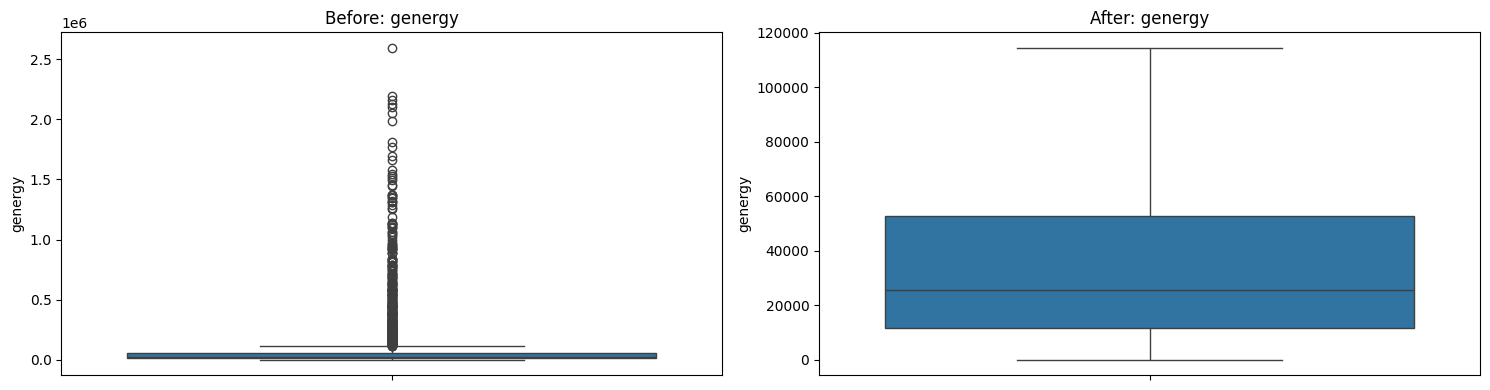

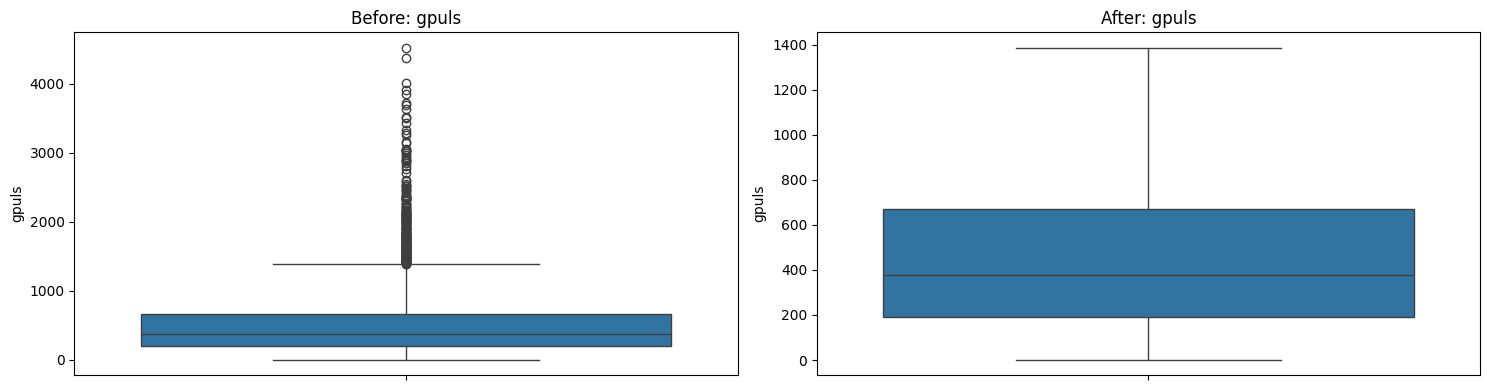

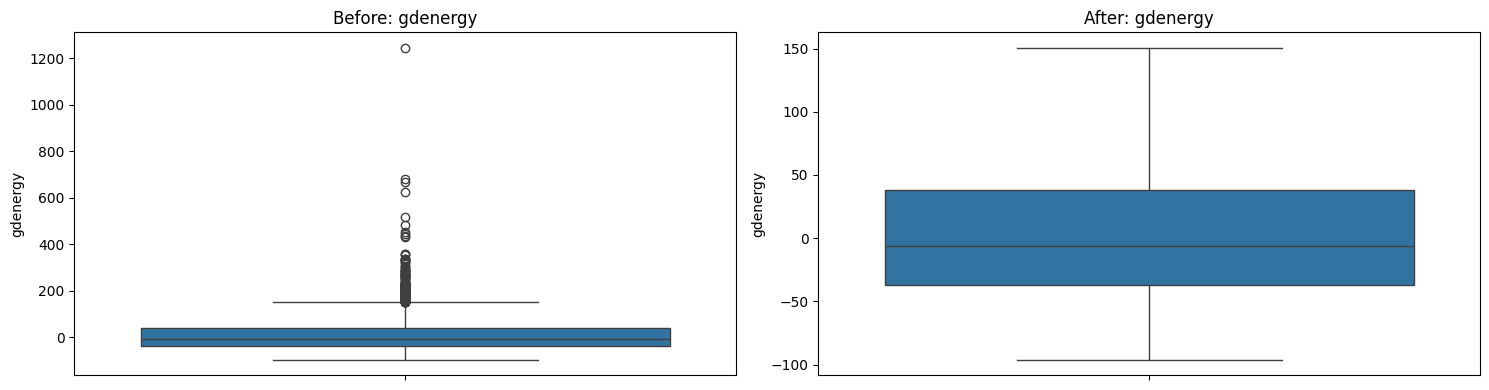

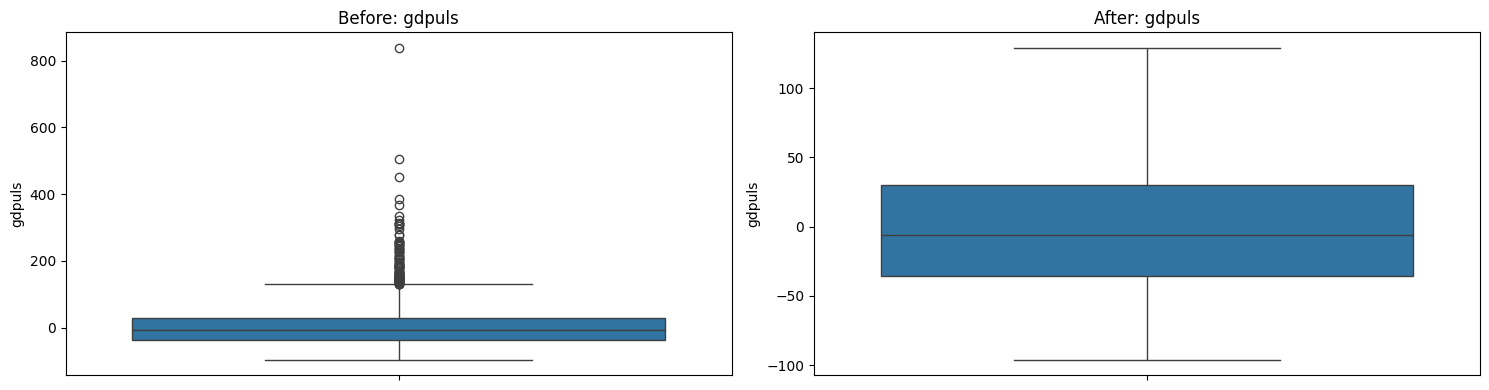

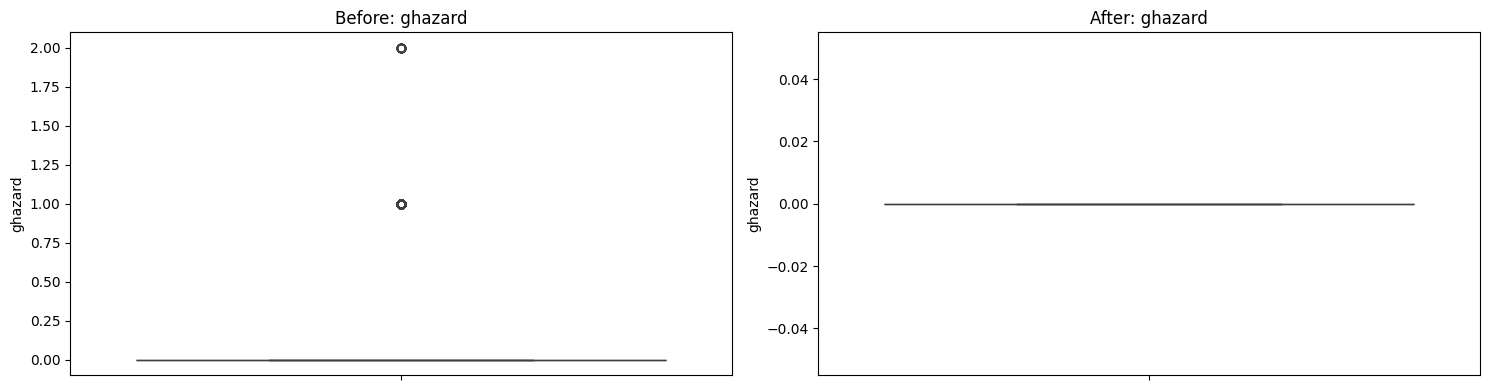

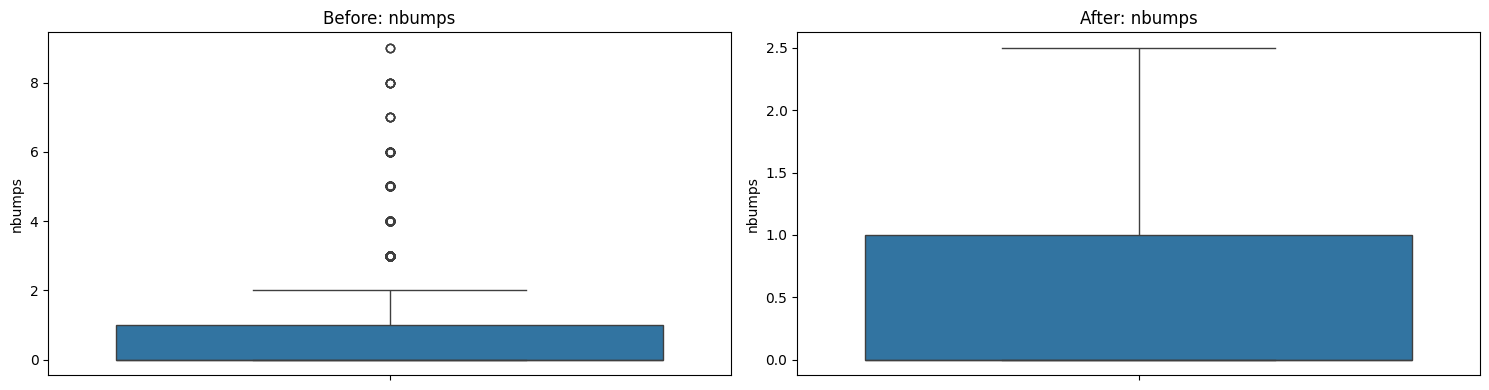

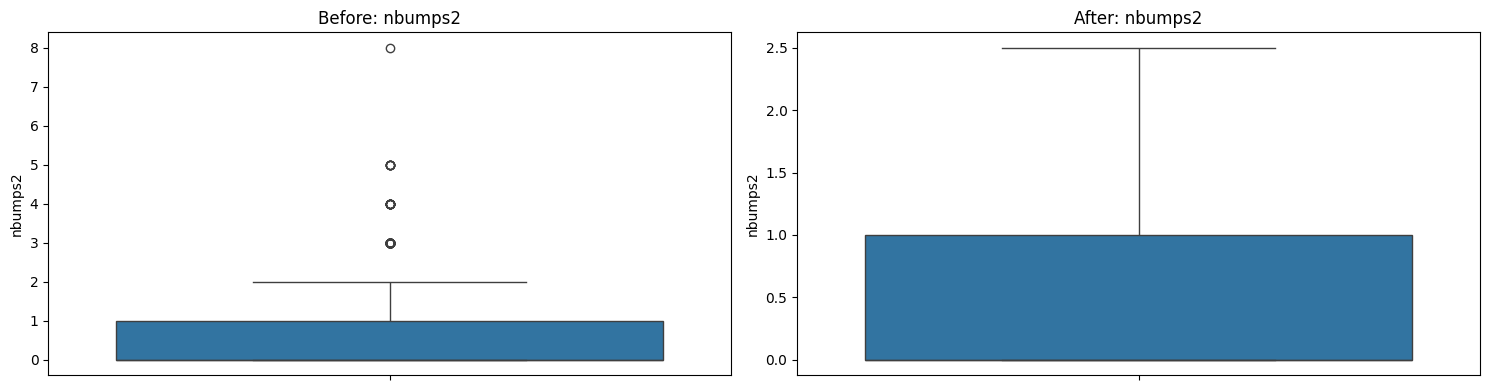

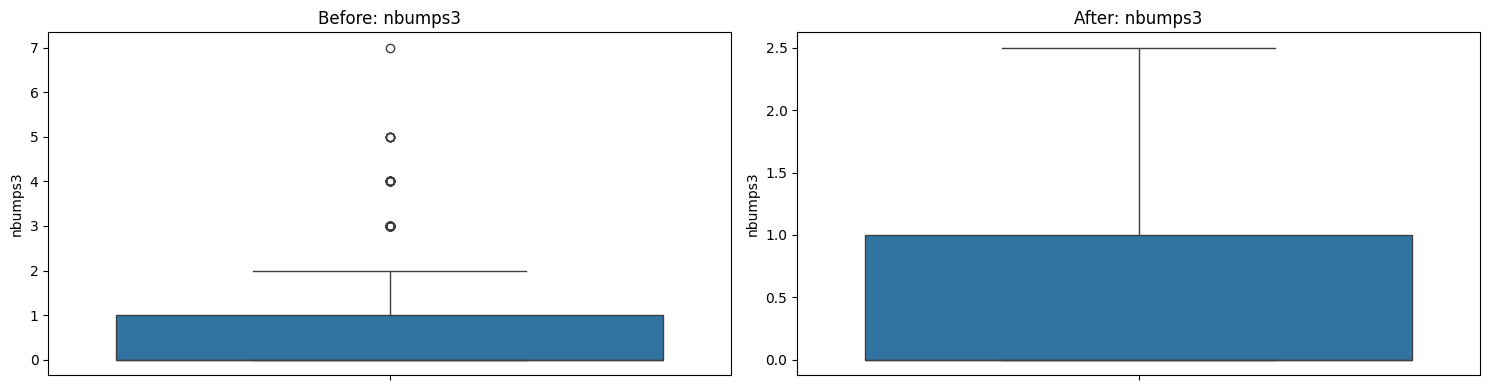

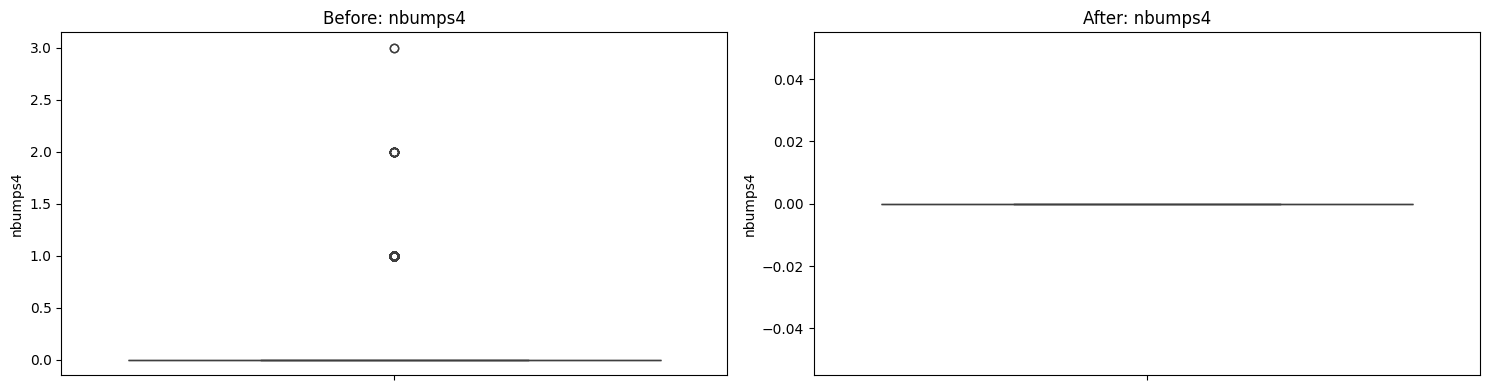

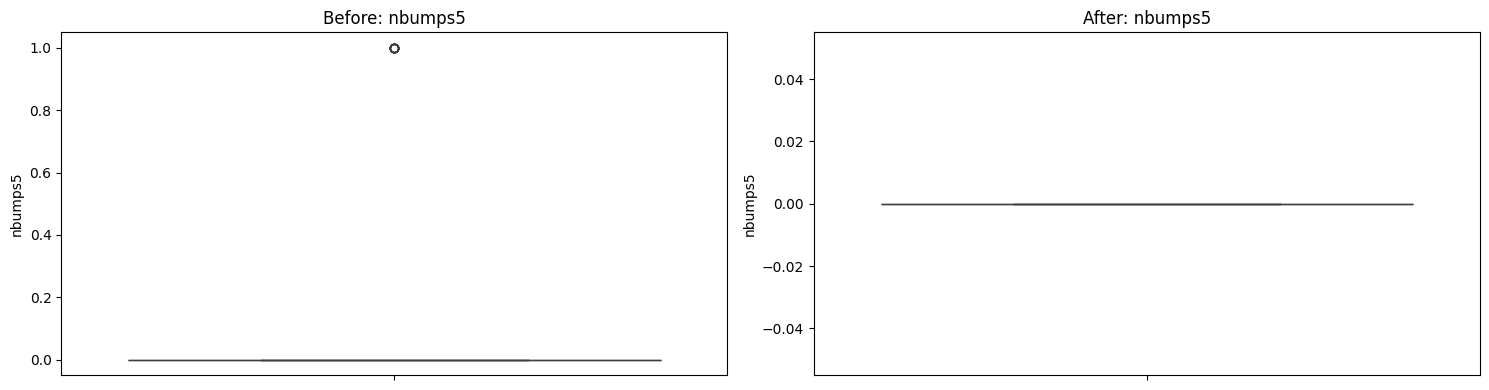

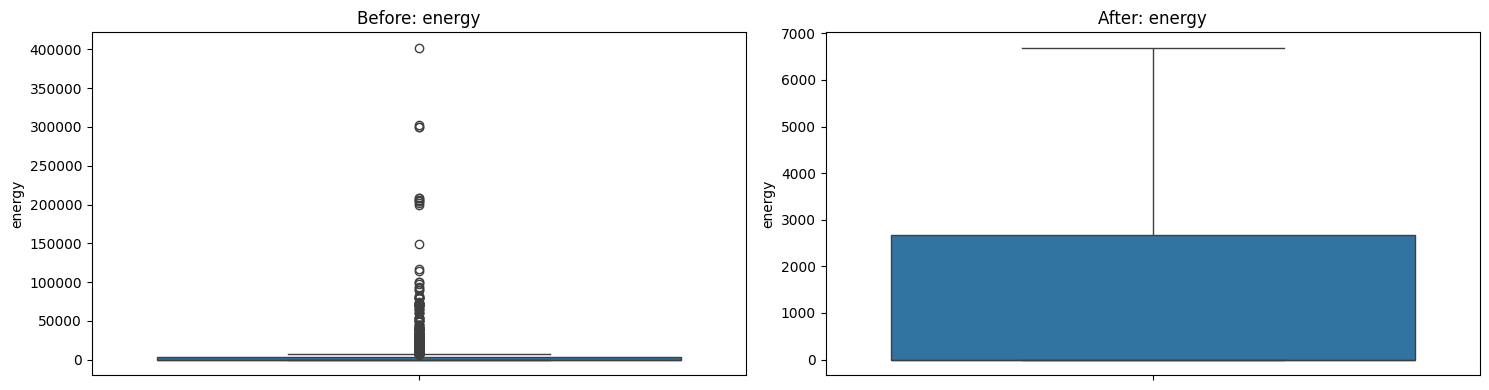

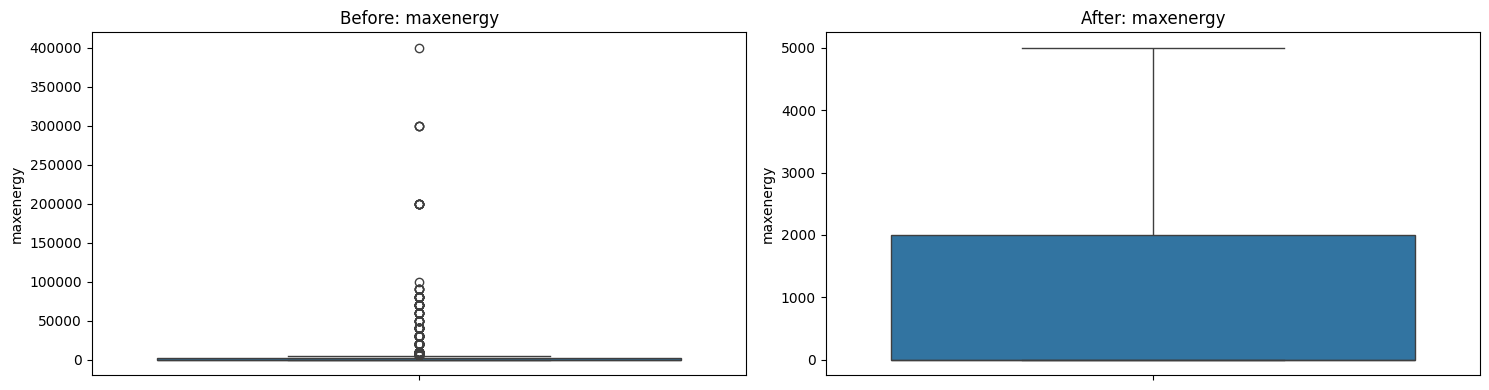

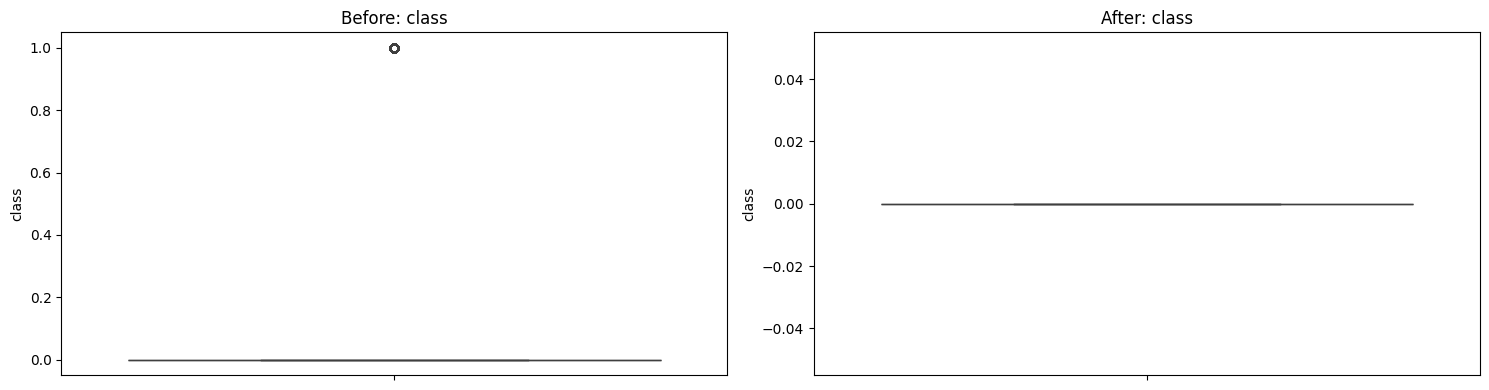

In [ ]:
# Create subplots to compare before and after for each column
def compare_outliers(seismic_data_original, seismic_data_cleaned, columns):
    for col in columns:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

        # Original data boxplot
        sns.boxplot(data=seismic_data_original[col], ax=ax1)
        ax1.set_title(f'Before: {col}')

        # Cleaned data boxplot
        sns.boxplot(data=seismic_data_cleaned[col], ax=ax2)
        ax2.set_title(f'After: {col}')

        plt.tight_layout()
        plt.show()

# Compare the original and cleaned data
columns_with_outliers = [
    'genergy', 'gpuls', 'gdenergy', 'gdpuls', 'ghazard',
    'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5',
    'energy', 'maxenergy', 'class'
]

compare_outliers(seismic_data, seismic_data_cleaned, columns_with_outliers)


# 8: Feature Selection
### Purpose: Remove highly correlated features and prepare final feature set


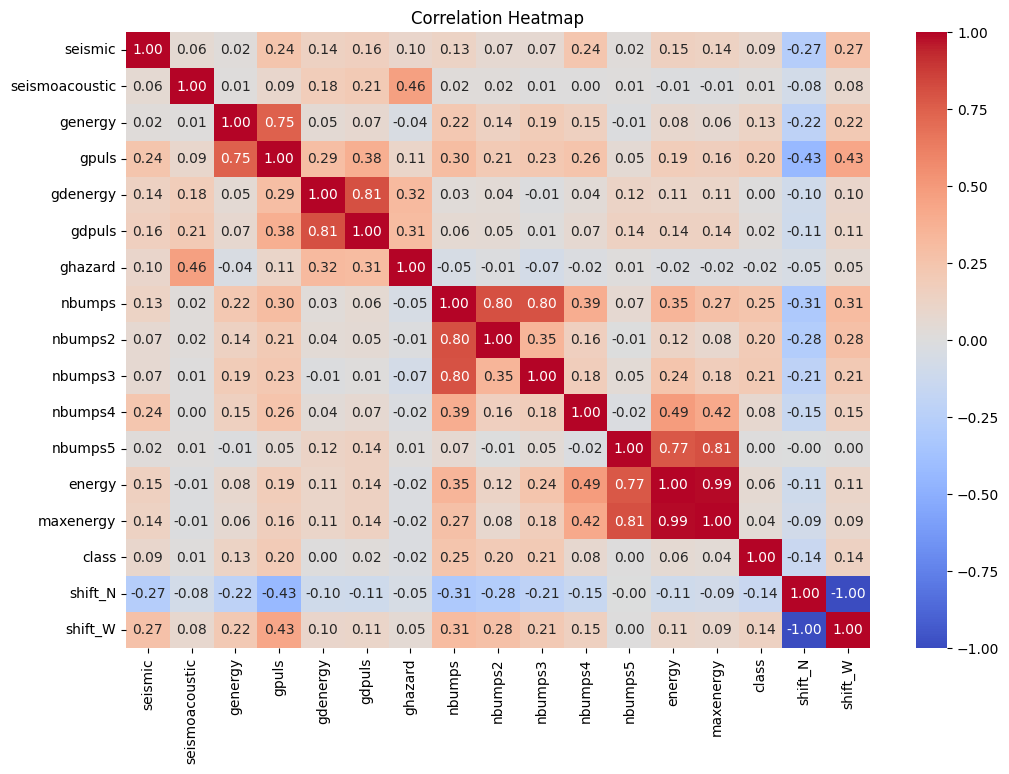

In [ ]:
# Calculate correlation matrix first
correlation_matrix = seismic_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Calculate correlation matrix first
correlation_matrix = seismic_data.corr()

# Remove highly correlated features
correlated_features = ['energy', 'gdpuls', 'nbumps5', 'nbumps2', 'nbumps3']
seismic_data = seismic_data.drop(columns=correlated_features)

# Print the status of removal
print(f"\nRemoved correlated features: {correlated_features}")

# Recalculate correlation matrix after feature removal
correlation_matrix = seismic_data.corr()



Removed correlated features: ['energy', 'gdpuls', 'nbumps5', 'nbumps2', 'nbumps3']


# 9: Data Splitting and Preprocessing
---



### Purpose: Prepare data for model training


In [ ]:
# Correlation with the target column
correlation_with_target = correlation_matrix['class'].drop('class')

# Set a threshold for feature selection based on correlation with the target
threshold = 0.1
selected_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()

# Prepare features (X) and target (y)
X = seismic_data[selected_features]
y = seismic_data['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE after scaling
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
# Verify balanced distribution
print("Balanced class distribution:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))


Balanced class distribution:
class
0    0.5
1    0.5
Name: proportion, dtype: float64


# 10: Model Training Function


---


### Purpose: Define function for training and evaluating models



In [ ]:
def train_and_evaluate_model_with_search(model, X_train, X_test, y_train, y_test, model_name, param_dist, grid_search=False):
    """
    Train and evaluate a model using either RandomizedSearchCV or GridSearchCV for hyperparameter tuning.
    """
    # Choose search method
    if grid_search:
        search = GridSearchCV(
            model,
            param_dist,
            cv=5,
            n_jobs=-1,
            scoring='accuracy'
        )
    else:
        search = RandomizedSearchCV(
            model,
            param_dist,
            n_iter=50,
            cv=5,
            n_jobs=-1,
            scoring='accuracy',
            random_state=42
        )

    # Fit the model
    search.fit(X_train, y_train)

    # Get best model and make predictions
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100

    # Print results
    print(f"\n=== {model_name} Results ===")
    print(f"Best Parameters: {search.best_params_}")
    print(f"Accuracy: {accuracy:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Create visualization plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        display_labels=['No Hazard', 'Hazard'],
        ax=ax1
    )
    ax1.set_title(f'{model_name} Confusion Matrix')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], 'k--', label='Random')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title(f'{model_name} ROC Curve')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    return best_model


# 11: Train Decision Tree
### Purpose: Train and evaluate Decision Tree model


=== Decision Tree Results ===
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}
Accuracy: 78.29%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       482
           1       0.10      0.29      0.15        34

    accuracy                           0.78       516
   macro avg       0.52      0.56      0.51       516
weighted avg       0.89      0.78      0.83       516



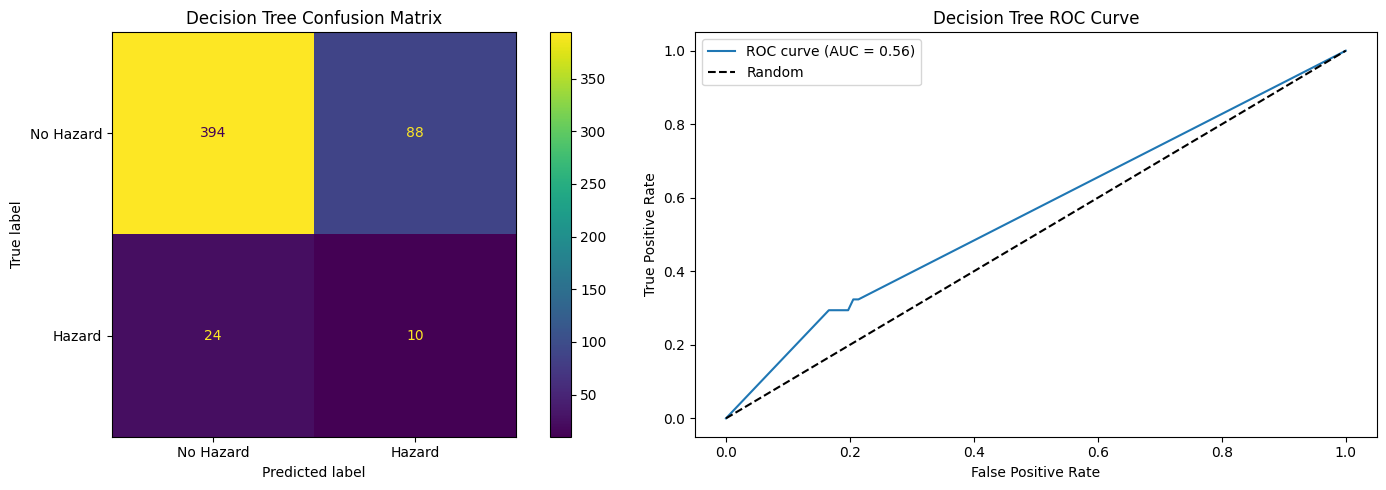

In [ ]:
# Hyperparameter search space for Decision Tree
dt_param_dist = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Decision Tree Model with Randomized Search
dt_model = DecisionTreeClassifier(random_state=42)
best_dt_model = train_and_evaluate_model_with_search(
    dt_model,
    X_train_balanced,
    X_test_scaled,
    y_train_balanced,
    y_test,
    model_name='Decision Tree',
    param_dist=dt_param_dist,
    grid_search=False
)



In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(150, 65))
plot_tree(best_dt_model,
          feature_names=['nbumps', 'gpuls', 'shift_N', 'shift_W', 'genergy', 'seismic',
                         'nbumps4', 'maxenergy', 'ghazard', 'seismoacoustic', 'gdenergy'],
          class_names=[str(cls) for cls in best_dt_model.classes_],
          filled=True)
plt.show()


# 12: Train Logistic Regression

### Purpose: Train and evaluate Logistic Regression model


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



=== Logistic Regression Results ===
Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'C': 0.1}
Accuracy: 77.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       482
           1       0.16      0.59      0.25        34

    accuracy                           0.77       516
   macro avg       0.56      0.69      0.56       516
weighted avg       0.91      0.77      0.83       516



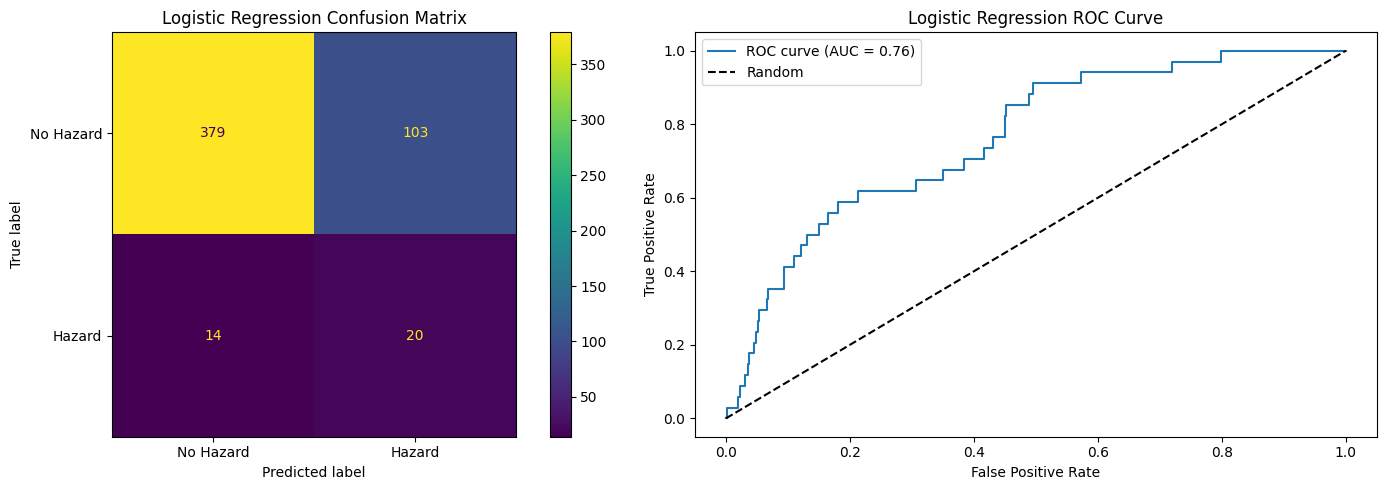

In [ ]:
lr_param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

# Training Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
best_lr_model = train_and_evaluate_model_with_search(
    lr_model,
    X_train_balanced,
    X_test_scaled,
    y_train_balanced,
    y_test,
    model_name='Logistic Regression',
    param_dist=lr_param_dist,
    grid_search=False
)


# 13: Train SVM
### Purpose: Train and evaluate SVM model


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



=== SVM Results ===
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'class_weight': 'balanced', 'C': 10}
Accuracy: 78.49%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       482
           1       0.17      0.56      0.26        34

    accuracy                           0.78       516
   macro avg       0.56      0.68      0.56       516
weighted avg       0.91      0.78      0.83       516



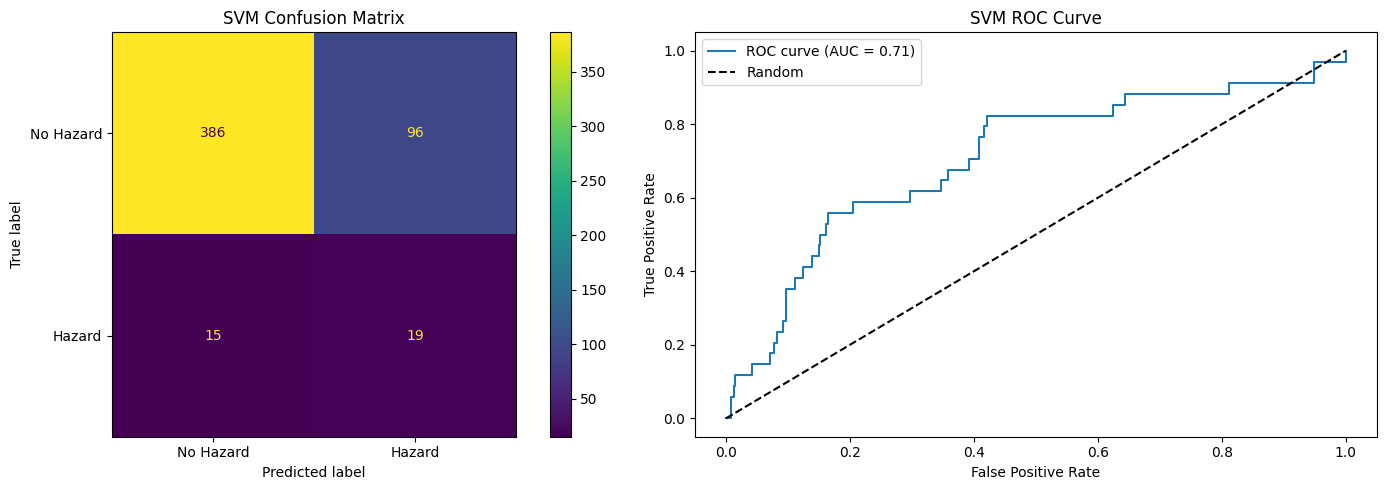

In [ ]:

svm_param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale'],
    'degree': [2, 3],
    'class_weight': ['balanced']
}

# SVM Model with Randomized Search
svm_model = SVC(random_state=42, probability=True)
best_svm_model = train_and_evaluate_model_with_search(
    svm_model,
    X_train_balanced,
    X_test_scaled,
    y_train_balanced,
    y_test,
    model_name='SVM',
    param_dist=svm_param_dist,
    grid_search=False
)


In [ ]:
# Install necessary package for conversion
!pip install nbconvert

# Convert the notebook to HTML format
!jupyter nbconvert --to html "/content/22067843 Pariksha Adhikari.ipynb"

# Verify the file exists and then download
import os
html_file = "/content/22067843 Pariksha Adhikari.html"

if os.path.exists(html_file):
    from google.colab import files
    files.download(html_file)
else:
    print(f"Error: {html_file} not found.")


[NbConvertApp] WARNING | pattern '/content/22067843 Pariksha Adhikari.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer